# Importing Dataset


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_resume=pd.read_csv('raw_data/Data_Set_CV_Cleaned_version test.csv')
df_resume.drop(['Unnamed: 0'],axis=1,inplace=True)
df_resume=df_resume.rename(columns={'New_Category':'Category','CV_cleaned':'Resume'})
df_resume.dropna(inplace=True)
df_resume=df_resume.drop_duplicates()
df_resume['lenght']=df_resume['Resume'].apply(len)

<AxesSubplot: xlabel='lenght', ylabel='Count'>

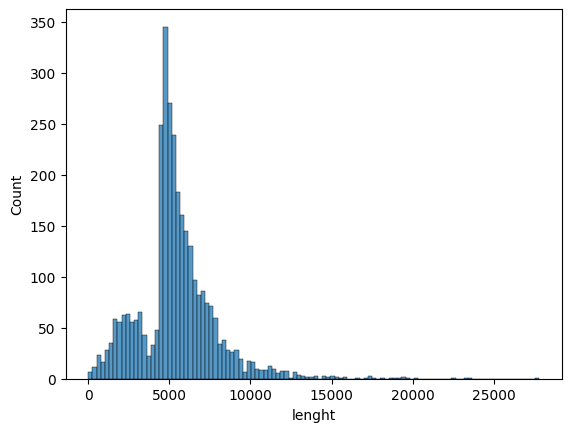

In [11]:
sns.histplot(df_resume['lenght'])

In [8]:
len_max=10000
df_resume_filtred=df_resume[df_resume['lenght']<len_max]

In [9]:
df_resume_filtred['Category'].value_counts()

Engineering and Construction        353
Arts, Culture, and Entertainment    346
Sales and Commerce                  345
Finance and Accounting              342
Health and Life Sciences            256
Marketing and Communication         215
Administration and Management       204
Human Resources                     157
Transport and Logistics             143
Tourism and Hospitality             138
Law and Legal                       131
Education and Training              129
Personal and Community Services     127
Technology and IT                   114
Science and Research                 71
Name: Category, dtype: int64

In [19]:
num_categories= len(df_resume_filtred['Category'].value_counts())
num_categories

15

In [10]:
# Création d'un échantillon aléatoire de 20% du dataset complet
sample_df = df_resume_filtred.sample(frac=0.2, random_state=42)
full_df=df_resume_filtred

# Training the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

# X=sample_df['Resume']
# y=sample_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to integers
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y)

# Tokenizer to convert text into sequences of integers
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

#Padding to ensure all sequences have the same length
max_len = 5000

X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_seq, padding='post', maxlen=max_len)

# Create the model

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len,mask_zero=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
epochs=1000
model.fit(X_padded, y_labels, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])  # modifier le nombre d'epoch

# Evaluate the model on the entire dataset
test_loss, test_acc = model.evaluate(X_padded, y_labels)
print("Accuracy on the entire dataset:", test_acc)
